## **Allocation of marks**

Stages 1,2,3   Total 30%

Ideally your dataset will not need a lot of work. Marks going for the choosing,  training, evaluation and refining of model primarily




---



Stage 4,5       Total 60%

Choose your model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


Train and evaluate your model. Refine the model or choose another estimator or approach?

Do not overwrite cells and add commentry between iterations.



---




Stage 6         Total 10%

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import queue
import copy
import random as rd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving steph stats.csv to steph stats.csv


In [3]:
# create dataframe with the data
steph_stats = pd.read_csv("steph stats.csv", encoding = "ISO-8859-1")

# **Stage 1**
***Describe Data***

This dataset was sourced from Kaggle (https://www.kaggle.com/datasets/mujinjo/stephen-curry-stats-20092021-in-nba?resource=download&select=Stephen+Curry+Stats.csv). It contains the NBA stats for basketball player Stephen Curry. Widely considered to be the best 3-point shooter ever, Curry has racked up numerous accolades and is a 4x champion and 2x MVP of the league. This dataset contains stats from all of his matches (921 games) from when he was drafted to the NBA in 2009, up until the 2020-2021 season. The column names are as follows: 

•	Season_year : Season, ex) 2020-2021 (str)

•	Season_div : Pre season, Regular season, Post Season (str)

•	Date : Date of the game

•	OPP : Opposite (str)

•	Result : Won or Loss (str)

•	T Score : Score of the Team involved Stephen Curry (int)

•	O Score : Score of the other (int)

•	MIN : Minutes played in game (float)

•	FG : Field goals made - attempted (str)

•	FG% : Field goals made, attempted and percentage (float)

•	3PT : Three-point field goals made - attempted (str)

•	3PT% : Three-point field goals made, attempted and percentage (float)

•	FT : Free throws made - attempted (str)

•	FT% : Free throws made, attempted and percentage (float)

•	REB : Rebounds in game (int)

•	AST : Assists in game (int)

•	BLK : Blocks in game (int)

•	STL : Steals in game (int)

•	PF : Personal fouls in game (int)

•	TO : Turnover in game (int)

•	PTS : Points in game (int)




In [4]:
#look at shape and values of the  data 
print(steph_stats.shape)
display(steph_stats.head())
display(steph_stats.tail())
print(steph_stats.info())

(921, 27)


,Season_year,Season_div,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS,Date
0,2009-2010,Regular,POR,W,122,116,48,13-25,13,25,...,12,100.0,9,8,1,2,0,2,42,14/4/2010
1,2009-2010,Regular,UTA,L,94,103,41,5-15,5,15,...,6,100.0,5,6,0,2,4,2,17,13/4/2010
2,2009-2010,Regular,OKC,W,120,117,35,9-16,9,16,...,6,66.7,7,7,0,1,2,5,25,11/4/2010
3,2009-2010,Regular,LAC,L,104,107,41,10-19,10,19,...,4,100.0,9,4,0,3,5,3,29,10/4/2010
4,2009-2010,Regular,MIN,W,116,107,44,12-22,12,22,...,0,0.0,8,14,0,7,4,4,27,7/4/2010


,Season_year,Season_div,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS,Date
916,2020-2021,Regular,MEM,L,112,117,47,13-28,13,28,...,7,100.0,4,5,0,3,5,7,39,21/5/
917,2020-2021,Regular,LAL,L,100,103,41,12-23,12,23,...,8,87.5,7,3,0,0,2,6,37,19/5/
918,2020-2021,Regular,SAC,W,113,105,29,9-23,9,23,...,5,100.0,6,3,0,2,2,1,29,17/12/2020
919,2020-2021,Regular,SAC,L,113,114,28,11-21,11,21,...,3,66.7,4,4,1,3,0,4,29,15/12/2020
920,2020-2021,Regular,DEN,W,107,105,21,3-10,3,10,...,2,100.0,1,3,0,2,1,3,10,12/12/2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season_year  921 non-null    object 
 1   Season_div   921 non-null    object 
 2   OPP          921 non-null    object 
 3   Result       921 non-null    object 
 4   T Score      921 non-null    int64  
 5   O Score      921 non-null    int64  
 6   MIN          921 non-null    int64  
 7   FG           921 non-null    object 
 8   FGM          921 non-null    int64  
 9   FGA          921 non-null    int64  
 10  FG%          921 non-null    float64
 11  3PT          921 non-null    object 
 12  3PTM         921 non-null    int64  
 13  3PTA         921 non-null    int64  
 14  3P%          921 non-null    float64
 15  FT           921 non-null    object 
 16  FTM          921 non-null    int64  
 17  FTA          921 non-null    int64  
 18  FT%          921 non-null    float64
 19  REB     

In [5]:
#look at his average points for his career
career_pts_avg = steph_stats['PTS'].mean()
print('Average numbers of points per game over his career: ', career_pts_avg)

Average numbers of points per game over his career:  24.271444082519


I want to look at how his stats differ from the post season (playoffs) compared to the regular season (each season there are 82 regular season games and the best 16 teams then enter the playoffs where they can play anywhere from 4 - 28 additional games).

In [6]:
# Filter the steph_stats dataframe to only include rows where Season_div equals 'Regular' and 'Post'
regular_season_stats = steph_stats.loc[steph_stats['Season_div'] == 'Regular']
post_season_stats = steph_stats.loc[steph_stats['Season_div'] == 'Post']


# Calculate the average of the PTS column
regular_season_pts_avg = regular_season_stats['PTS'].mean()
post_season_pts_avg = post_season_stats['PTS'].mean()

# Calculate the average of the Min column
regular_season_min_avg = regular_season_stats['MIN'].mean()
post_season_min_avg = post_season_stats['MIN'].mean()


print("Average points per game in Regular season: ", regular_season_pts_avg)
print("Average points per game in Post season: ", post_season_pts_avg)
print("Average minutes played in Regular season: ", regular_season_min_avg)
print("Average minutes in Post season: ", post_season_min_avg)

Average points per game in Regular season:  24.2532637075718
Average points per game in Post season:  26.5
Average minutes played in Regular season:  34.35770234986945
Average minutes in Post season:  37.848214285714285


His average number of points and minutes in the post-season (playoffs) is higher. This could be for a number of reasons, such as the fact that his team might only make it to the post season if he is playing well and scoring lots of points, and there are higher stakes in the playoffs which may lead to him playing more minutes or with more intensity. For the purposes of this model I am only going to include stats for the regular season because the stakes do not change as much night to night (post season games bring with them the risk of being eliminated, regular seasons ones don't), the presence of the games is not contingent on his performances like they are in the playoffs, and the majority of the datapoints are for the reglar season. 

In [7]:
#drop any values that aren't Regular i.e. post and preseason
steph_stats = steph_stats[steph_stats['Season_div'].isin(['Regular'])]
print(steph_stats.shape)

(766, 27)


Left with 766 regular season games for use in the model. Lets look at some averages to get an idea of his regular season career stats. 

In [8]:
pts_avg = steph_stats['PTS'].mean()
min_avg = steph_stats['MIN'].mean()
fg_attempted_avg = steph_stats['FGA'].mean()
fg_pc_avg = steph_stats['FG%'].mean()
threept_attempted_avg = steph_stats['3PTA'].mean()
threept_pc_avg = steph_stats['3P%'].mean()

print('Average points per game: ', pts_avg)
print('Average minutes per game: ', min_avg)
print('Average field goals attempted per game: ', fg_attempted_avg)
print('Average field goal percentage: ', fg_pc_avg)
print('Average 3 pointers attempted per game: ', threept_attempted_avg)
print('Average 3 pointer percentage: ', threept_pc_avg)

Average points per game:  24.2532637075718
Average minutes per game:  34.35770234986945
Average field goals attempted per game:  17.494778067885118
Average field goal percentage:  47.07832898172324
Average 3 pointers attempted per game:  8.612271540469974
Average 3 pointer percentage:  42.03302872062664


In [9]:
#lets look at last seasons stats to see how they differ from career averages
last_season_stats = steph_stats.loc[steph_stats['Season_year'] == '2020-2021']

In [10]:
pts_avg = last_season_stats['PTS'].mean()
min_avg = last_season_stats['MIN'].mean()
fg_attempted_avg = last_season_stats['FGA'].mean()
fg_pc_avg = last_season_stats['FG%'].mean()
threept_attempted_avg = last_season_stats['3PTA'].mean()
threept_pc_avg = last_season_stats['3P%'].mean()

print('Average points per game: ', pts_avg)
print('Average minutes per game: ', min_avg)
print('Average field goals attempted per game: ', fg_attempted_avg)
print('Average field goal percentage: ', fg_pc_avg)
print('Average 3 pointers attempted per game: ', threept_attempted_avg)
print('Average 3 pointer percentage: ', threept_pc_avg)

Average points per game:  31.75
Average minutes per game:  34.088235294117645
Average field goals attempted per game:  21.61764705882353
Average field goal percentage:  47.836764705882345
Average 3 pointers attempted per game:  12.617647058823529
Average 3 pointer percentage:  41.38529411764705


In [11]:
#lets look at his first seasons stats to see how they differ from career averages
first_season_stats = steph_stats.loc[steph_stats['Season_year'] == '2009-2010']

In [12]:
pts_avg = first_season_stats['PTS'].mean()
min_avg = first_season_stats['MIN'].mean()
fg_attempted_avg = first_season_stats['FGA'].mean()
fg_pc_avg = first_season_stats['FG%'].mean()
threept_attempted_avg = first_season_stats['3PTA'].mean()
threept_pc_avg = first_season_stats['3P%'].mean()

print('Average points per game: ', pts_avg)
print('Average minutes per game: ', min_avg)
print('Average field goals attempted per game: ', fg_attempted_avg)
print('Average field goal percentage: ', fg_pc_avg)
print('Average 3 pointers attempted per game: ', threept_attempted_avg)
print('Average 3 pointer percentage: ', threept_pc_avg)

Average points per game:  17.4875
Average minutes per game:  36.1875
Average field goals attempted per game:  14.2875
Average field goal percentage:  44.628750000000004
Average 3 pointers attempted per game:  4.75
Average 3 pointer percentage:  40.713750000000005


In [13]:
#max and minimum points he has scored in a game
min_points = steph_stats['PTS'].min()
max_points = steph_stats['PTS'].max()

print(min_points)
print(max_points)

0
62


In [14]:
#see what are most common points values
point_counts = steph_stats['PTS'].value_counts()
print(point_counts)

22    37
25    36
24    33
27    32
28    30
20    29
29    29
23    29
26    27
32    27
19    27
15    25
14    25
21    22
18    21
13    21
31    21
17    21
30    21
34    17
35    17
16    17
37    15
9     15
36    14
38    14
11    14
10    14
12    13
33    13
42     8
8      8
39     7
40     7
5      6
7      6
41     6
46     5
6      5
0      4
51     4
4      3
49     3
47     3
44     3
53     2
43     2
45     2
54     1
2      1
3      1
48     1
57     1
62     1
Name: PTS, dtype: int64


As we can see there is a big difference in his stats from his rookie year compared to last year. This is to be expected as one would expect a player to improve as he gets older and more experienced. Additionally, last season Steph curry was well-established as one of the best players in the world who is going to be given the green light to take a lot of shots, while a rookie who is fresh into the league will not have that kind of freedom to take shots. The model should take this into account. Lets have a look at his average points per season.

In [15]:
# Loop through each season in the Season_year column
for season in steph_stats['Season_year'].unique():
    # Get the subset of rows for the current year
    season_df = steph_stats[steph_stats['Season_year'] == season]
    # Calculate the average PTS for the current year
    avg_pts = season_df['PTS'].mean()
    # Print the results
    print(f"Average PTS for {season}: {avg_pts:.2f}")

Average PTS for 2009-2010: 17.49
Average PTS for 2010-2011: 18.55
Average PTS for 2011-2012: 15.32
Average PTS for 2012-2013: 22.90
Average PTS for 2013-2014: 24.01
Average PTS for 2014-2015: 23.75
Average PTS for 2015-2016: 30.06
Average PTS for 2016-2017: 25.30
Average PTS for 2017-2018: 26.39
Average PTS for 2018-2019: 27.26
Average PTS for 2019-2020: 20.80
Average PTS for 2020-2021: 31.75


In [16]:
# Look at how many minutes differs each season
# Loop through each season in the Season_year column
for season in steph_stats['Season_year'].unique():
    # Get the subset of rows for the current year
    season_df = steph_stats[steph_stats['Season_year'] == season]
    # Calculate the average minutes for the current year
    avg_mins = season_df['MIN'].mean()
    # Print the results
    print(f"Average minutes for {season}: {avg_mins:.2f}")

Average minutes for 2009-2010: 36.19
Average minutes for 2010-2011: 33.68
Average minutes for 2011-2012: 29.12
Average minutes for 2012-2013: 38.29
Average minutes for 2013-2014: 36.45
Average minutes for 2014-2015: 32.66
Average minutes for 2015-2016: 34.24
Average minutes for 2016-2017: 33.39
Average minutes for 2017-2018: 31.98
Average minutes for 2018-2019: 33.75
Average minutes for 2019-2020: 27.80
Average minutes for 2020-2021: 34.09


In [17]:
# Look at how many games he payed each season
# Loop through each season in the Season_year column
for season in steph_stats['Season_year'].unique():
    # Get the subset of rows for the current year
    season_df = steph_stats[steph_stats['Season_year'] == season]
    # Calculate the number of games for the current year
    games_played = season_df['Result'].count()
    # Print the results
    print(f"Number of games played per season: {season}: {games_played:}")

Number of games played per season: 2009-2010: 80
Number of games played per season: 2010-2011: 74
Number of games played per season: 2011-2012: 25
Number of games played per season: 2012-2013: 78
Number of games played per season: 2013-2014: 78
Number of games played per season: 2014-2015: 80
Number of games played per season: 2015-2016: 79
Number of games played per season: 2016-2017: 79
Number of games played per season: 2017-2018: 51
Number of games played per season: 2018-2019: 69
Number of games played per season: 2019-2020: 5
Number of games played per season: 2020-2021: 68


There is large variation season to season in how many points he averages each season, which could be due to things such as injuries and team mates. The large variation means that as a predictor for his next match, it would be more useful to look at the averages for the previous few games (lets say 5 to start) and make our predictions based on these figures. Lets add these rolling figures to the dataset now. 

In [18]:
#add rolling averages columns for some of his stats
steph_stats['rolling_pts'] = steph_stats.rolling(window=5).PTS.mean()
steph_stats['rolling_mins'] = steph_stats.rolling(window=5).MIN.mean()
steph_stats['rolling_3pt_attempted'] = steph_stats.rolling(window=5)['3PTA'].mean()
steph_stats['rolling_3pt_made'] = steph_stats.rolling(window=5)['3PTM'].mean()
steph_stats['rolling_3pt_pc'] = steph_stats.rolling(window=5)['3P%'].mean()
steph_stats['rolling_fg_attempted'] = steph_stats.rolling(window=5).FGA.mean()
steph_stats['rolling_fg_made'] = steph_stats.rolling(window=5).FGM.mean()
steph_stats['rolling_fg_pc'] = steph_stats.rolling(window=5)['FG%'].mean()
steph_stats['rolling_ft_attempted'] = steph_stats.rolling(window=5).FTA.mean()
steph_stats['rolling_ft_made'] = steph_stats.rolling(window=5).FTM.mean()
steph_stats['rolling_ft_pc'] = steph_stats.rolling(window=5)['FT%'].mean()
display(steph_stats.head(20))

,Season_year,Season_div,OPP,Result,T Score,O Score,MIN,FG,FGM,FGA,...,rolling_mins,rolling_3pt_attempted,rolling_3pt_made,rolling_3pt_pc,rolling_fg_attempted,rolling_fg_made,rolling_fg_pc,rolling_ft_attempted,rolling_ft_made,rolling_ft_pc
0,2009-2010,Regular,POR,W,122,116,48,13-25,13,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-2010,Regular,UTA,L,94,103,41,5-15,5,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-2010,Regular,OKC,W,120,117,35,9-16,9,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-2010,Regular,LAC,L,104,107,41,10-19,10,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-2010,Regular,MIN,W,116,107,44,12-22,12,22,...,41.8,6.2,3.2,50.34,19.4,9.8,49.74,5.6,5.2,73.34
5,2009-2010,Regular,WSH,L,94,112,33,10-21,10,21,...,38.8,6.2,3.0,47.00,18.6,9.2,48.86,4.0,3.6,73.34
6,2009-2010,Regular,TOR,W,113,112,44,10-23,10,23,...,39.4,7.6,3.8,51.10,20.2,10.2,50.90,4.0,3.2,66.68
7,2009-2010,Regular,NYK,W,128,117,29,7-21,7,21,...,38.2,7.4,3.4,45.10,21.2,9.8,46.30,2.8,2.4,53.34
8,2009-2010,Regular,UTA,L,104,128,34,6-16,6,16,...,36.8,6.2,2.6,40.10,20.6,9.0,43.28,2.6,2.0,46.68
9,2009-2010,Regular,LAC,W,121,103,40,8-15,8,15,...,36.0,5.6,2.4,48.10,19.2,8.2,43.04,2.6,2.0,46.68


Have a look at the different opposition he has played and see if opposition seems to have a big effect e.g. on average does he score more against the Lakers than the Celtics?

In [19]:
# Loop through each team in the OPP column
for team in steph_stats['OPP'].unique():
    # Get the subset of rows for the current year
    team_df = steph_stats[steph_stats['OPP'] == team]
    # Calculate the average PTS for the current year
    avg_pts_per_team = team_df['PTS'].mean()
    # Print the results
    print(f"Average PTS against {team}: {avg_pts_per_team:.2f}")

Average PTS against POR: 28.03
Average PTS against UTA: 23.72
Average PTS against OKC: 26.16
Average PTS against LAC: 24.41
Average PTS against MIN: 25.58
Average PTS against WSH: 27.76
Average PTS against TOR: 27.42
Average PTS against NYK: 25.20
Average PTS against DAL: 23.73
Average PTS against MEM: 25.33
Average PTS against PHX: 22.05
Average PTS against LAL: 21.14
Average PTS against NOP: 26.25
Average PTS against CHA: 27.29
Average PTS against ATL: 23.24
Average PTS against ORL: 25.56
Average PTS against MIA: 25.67
Average PTS against DET: 23.53
Average PTS against DEN: 23.00
Average PTS against PHI: 23.60
Average PTS against SAC: 23.32
Average PTS against HOU: 23.64
Average PTS against BKN: 25.26
Average PTS against CHI: 22.43
Average PTS against MIL: 21.06
Average PTS against CLE: 25.22
Average PTS against BOS: 23.75
Average PTS against SAS: 21.37
Average PTS against IND: 20.33


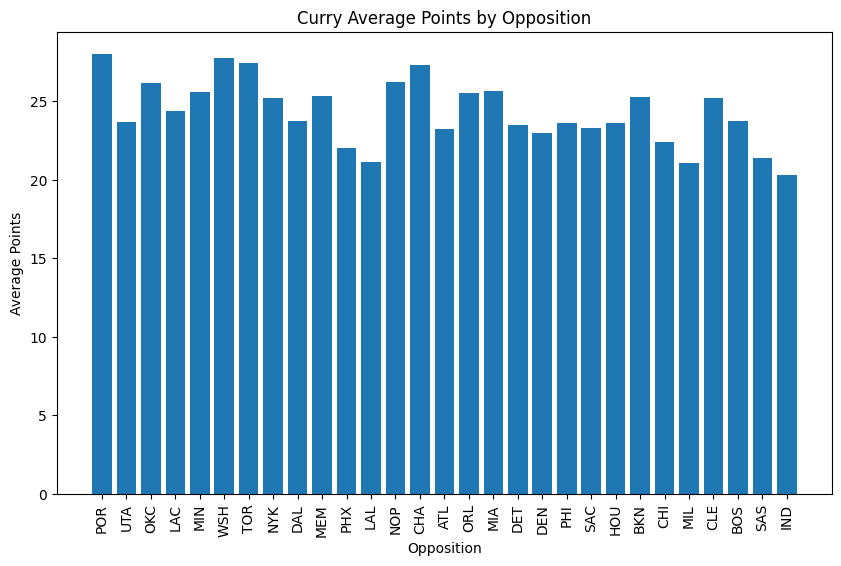

In [20]:
#graph this to see it clearer
# Create a list of opoosition teams and his average points
teams = []
avg_pts = []

for team in steph_stats['OPP'].unique():
    # Get the subset of rows for the current team
    team_df = steph_stats[steph_stats['OPP'] == team]
    # Calculate the average PTS for the current team
    avg_pts_per_team = team_df['PTS'].mean()
    teams.append(team)
    avg_pts.append(avg_pts_per_team)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(teams, avg_pts)

# Set chart title and axis labels
ax.set_title('Curry Average Points by Opposition')
ax.set_xlabel('Opposition')
ax.set_ylabel('Average Points')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the chart
plt.show()

Can see that his average points differ quit a lot depending on the team he is playing, so taking into account his opposition will be valuable to add to the model. 

Should have a look at what stats correlate most with points scored - these will be useful to include in the model. 

In [21]:
#create a correlation matrix and see what correlates moost with points.
corr_matrix = steph_stats.corr()

# Extract the correlation values for PTS column
corr_values = corr_matrix['PTS'].sort_values(ascending=False)

# Print the correlation values
print(corr_values)

PTS                      1.000000
FGM                      0.944368
3PTM                     0.819735
FGA                      0.771833
3PTA                     0.711928
rolling_pts              0.615300
FG%                      0.605592
rolling_fg_made          0.581596
FTM                      0.554602
FTA                      0.553313
rolling_3pt_made         0.535831
rolling_3pt_attempted    0.529473
rolling_fg_attempted     0.522771
3P%                      0.476733
rolling_ft_attempted     0.453549
rolling_ft_made          0.450887
MIN                      0.406665
T Score                  0.399048
FT%                      0.360151
rolling_fg_pc            0.314425
rolling_ft_pc            0.307245
REB                      0.253530
rolling_3pt_pc           0.193010
rolling_mins             0.181705
O Score                  0.165597
TO                       0.148259
STL                      0.055233
AST                      0.031527
BLK                      0.027909
PF            

<ipython-input-21-4b0b79392ed3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = steph_stats.corr()


Can see that rebounds, steals and blocks for example have a very weak correlation with points scored so may nt be neccessary to include them in the model. 

# **Stage 2**

This model is a predictor to increase the profitailty of betting on Steph Curry NBA performances. Player points sports betting for basketball  involves betting on whether or not a specific player will score over or under a predicted number, set by the sportsbook. This number is based on the player's average points per game, opposition, health, recent performances etc. I want to create a model that will predict the amount of points Steph Curry will score in a match. My model will also take into account his opposition and recent performances, and hopefully be able to provide an extra element of insight that could be used to increase profitability when betting on the over / under i.e. by identifing times when Steph is predicted to have a good / bad game and bet accordingly on the outcome. 
Obviously, the sportsbook employs huge amounts of money and manpower to develop their predictions and it is unlikely that this project will be able to compete, but it may provide an extra element of insight that improves the chances somewhat of betting on the correct outcome.  

This probem is a useful one for a model such as this because there are so many games played that there are lots of data points, and it is easy to understand and implement. Additionally, if the model were to be somewhat effective,going forward I could see how my model performs on a game by game basis. 

# **Stage 3**

Cleaning the data, linking datasets etc.. 



In [58]:
#assign a number to each opp team to label them
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
team_names = steph_stats['OPP']

#drop first 4 rows so its lined up with X
team_names = team_names.drop(index=[0,1,2,3])
print(team_names.shape)
team_numbers = le.fit_transform(team_names)


(762,)


In [59]:
#convert these labels to vectors to remove any potential bias e.g. 29>6.
from tensorflow.keras.utils import to_categorical
opp_vectors = to_categorical(team_numbers)

#drop first 4 rows so its lined up with X
#opp_vectors = opp_vectors[4:766]

display(opp_vectors.shape)

(762, 29)

In [38]:
X.shape

(762, 11)

In [76]:
#add nba rankings file to get each teams win percentage on the night they are to face golden state warriors

#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving nba_rankings.csv to nba_rankings.csv


In [77]:
# create dataframe with the data
rankings = pd.read_csv("nba_rankings.csv", encoding = "ISO-8859-1")

In [82]:
rankings.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'DATE', 'CONFERENCE', 'TEAM', 'G',
       'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD', 'RETURNTOPLAY'],
      dtype='object')

In [93]:
steph_stats.Date

0       14/4/2010
1       13/4/2010
2       11/4/2010
3       10/4/2010
4        7/4/2010
5        6/4/2010
6        4/4/2010
7        2/4/2010
8       31/3/2010
9       28/3/2010
10      27/3/2010
11      24/3/2010
12      22/3/2010
13      20/3/2010
14      15/3/2010
15      13/3/2010
16      11/3/2010
17       8/3/2010
18       6/3/2010
19       5/3/2010
20       3/3/2010
21       2/3/2010
22      27/2/2010
23      25/2/2010
24      23/2/2010
25      21/2/2010
26      19/2/2010
27      17/2/2010
28      16/2/2010
29      10/2/2010
30       8/2/2010
31       6/2/2010
32       3/2/2010
33       2/2/2010
34      31/1/2010
35      29/1/2010
36      27/1/2010
37      26/1/2010
38      23/1/2010
39      22/1/2010
40      20/1/2010
41      18/1/2010
42      15/1/2010
43      13/1/2010
44      11/1/2010
45       8/1/2010
46       6/1/2010
47       5/1/2010
48       2/1/2010
49     29/12/2009
50     28/12/2009
51     26/12/2009
52     23/12/2009
53     22/12/2009
54     18/12/2009
55     16/

In [105]:
# can see two dates have read in without the year
steph_stats.at[916, 'Date'] = '21/5/2020'
steph_stats.at[917, 'Date'] = '19/5/2020'

In [104]:
steph_stats.Date

0       14/4/2010
1       13/4/2010
2       11/4/2010
3       10/4/2010
4        7/4/2010
5        6/4/2010
6        4/4/2010
7        2/4/2010
8       31/3/2010
9       28/3/2010
10      27/3/2010
11      24/3/2010
12      22/3/2010
13      20/3/2010
14      15/3/2010
15      13/3/2010
16      11/3/2010
17       8/3/2010
18       6/3/2010
19       5/3/2010
20       3/3/2010
21       2/3/2010
22      27/2/2010
23      25/2/2010
24      23/2/2010
25      21/2/2010
26      19/2/2010
27      17/2/2010
28      16/2/2010
29      10/2/2010
30       8/2/2010
31       6/2/2010
32       3/2/2010
33       2/2/2010
34      31/1/2010
35      29/1/2010
36      27/1/2010
37      26/1/2010
38      23/1/2010
39      22/1/2010
40      20/1/2010
41      18/1/2010
42      15/1/2010
43      13/1/2010
44      11/1/2010
45       8/1/2010
46       6/1/2010
47       5/1/2010
48       2/1/2010
49     29/12/2009
50     28/12/2009
51     26/12/2009
52     23/12/2009
53     22/12/2009
54     18/12/2009
55     16/

In [ ]:
#want to drop everything except team name, date and win percentage
rankings = rankings[['DATE', 'TEAM', 'W_PCT']]

In [97]:
#change names so that columns can match up with steph_stats dataframe
rankings = rankings.rename(columns={'DATE': 'Date', 'TEAM': 'OPP'})
print(rankings)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [98]:
# drop 0's so that the dates are in the same format
rankings['Date'] = rankings['Date'].apply(lambda x: x.lstrip('0').replace('/0', '/'))

In [107]:
#merge my steph stats on date and opp name so just get the opp w percentage on the night of the game
steph_stats_rank = pd.merge(steph_stats, rankings, on=['Date', 'OPP'])
pd.set_option('display.max_rows', None)
display(steph_stats_rank.shape)

(762, 39)

# **Stage 4**
Firstly, going to use past performance (the rolling averages for the past 5 games of points, minutes, field goals, 3 pointers, and free throws) to try and predict how many points were scored in the next game.

In [24]:
#first use the rolling averages to create a model. They will be the input, and the points will be the output.
X = steph_stats.drop(['Season_year', 'Season_div', 'OPP', 'Result', 'T Score', 'O Score', 'MIN',	'FG',	'FGM',	'FGA',	'FG%',	'3PT',	'3PTM',	'3PTA',	'3P%',	'FT',	'FTM',	'FTA',	'FT%',	'REB',	'AST',	'BLK',	'STL',	'PF',	'TO',	'PTS',	'Date'], axis=1)
#drop the first 4 rows of the dataframe as the rolling data did not have the previous games neccessary for the average and so are just missing values
X = X.drop(index=[0,1,2,3])
display(X)

,rolling_pts,rolling_mins,rolling_3pt_attempted,rolling_3pt_made,rolling_3pt_pc,rolling_fg_attempted,rolling_fg_made,rolling_fg_pc,rolling_ft_attempted,rolling_ft_made,rolling_ft_pc
4,28.0,41.8,6.2,3.2,50.34,19.4,9.8,49.74,5.6,5.2,73.34
5,25.0,38.8,6.2,3.0,47.00,18.6,9.2,48.86,4.0,3.6,73.34
6,27.4,39.4,7.6,3.8,51.10,20.2,10.2,50.90,4.0,3.2,66.68
7,25.4,38.2,7.4,3.4,45.10,21.2,9.8,46.30,2.8,2.4,53.34
8,22.6,36.8,6.2,2.6,40.10,20.6,9.0,43.28,2.6,2.0,46.68
...,...,...,...,...,...,...,...,...,...,...,...
916,29.0,35.4,11.8,4.0,33.78,21.6,9.2,42.38,6.6,6.6,100.00
917,30.2,36.6,11.8,4.2,36.00,22.8,9.8,42.24,6.6,6.4,97.50
918,28.8,35.2,11.4,4.4,38.58,22.4,9.4,41.26,5.8,5.6,97.50
919,30.8,35.0,12.0,5.0,42.28,23.2,10.4,44.68,5.4,5.0,90.84


In [25]:
Y = steph_stats['PTS']
#pd.set_option('display.max_rows', 10)

#drop first 4 Y values too so matches X 
Y = Y.drop(index=[0,1,2,3])
display(Y)

4      27
5      27
6      29
7      15
8      15
       ..
916    39
917    37
918    29
919    29
920    10
Name: PTS, Length: 762, dtype: int64

In [26]:
#import model 
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(15, activation ='relu', input_shape = (None, 11)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [28]:
model.compile(loss = 'mean_squared_error', optimizer ='adam', metrics =['mean_absolute_error'])

In [ ]:
model.fit(X, Y, epochs = 500)

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 89.5273 - mean_absolute_error: 7.4979
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 83.4192 - mean_absolute_error: 7.2302
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 79.0964 - mean_absolute_error: 7.0334
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 75.9949 - mean_absolute_error: 6.8850
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 72.3347 - mean_absolute_error: 6.7259
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 71.2183 - mean_absolute_error: 6.6424
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 70.2915 - mean_absolute_error: 6.5987
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 69.0536 - mean_absolute_error: 6.5606
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 68.4211 - mean_absolute_error: 6.5089
E

The loss function is not going down at all, staying stuck around the 60 mark.  Will have to revist the parameters.

**Model V2**

In [29]:
#model_v2
#going to change the number of neurons in the first and second layer to see if that makes a difference
model_v2 = Sequential()
model_v2.add(Dense(25, activation ='relu', input_shape = (None, 11)))
model_v2.add(Dense(18, activation='relu'))
model_v2.add(Dense(15, activation='relu'))
model_v2.add(Dense(6, activation='relu'))
model_v2.add(Dense(1, activation='linear'))

In [31]:
from keras.optimizers import SGD

In [32]:
# going to change the compile parameters 
optimizer = SGD(lr=0.01, momentum = 0.9)
model_v2.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics =['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_v2.fit(X, Y, epochs = 2000, batch_size = 32)

Epoch 1/2000
24/24 [==============================] - 0s 2ms/step - loss: 45.6988 - mean_absolute_error: 5.3003
Epoch 2/2000
24/24 [==============================] - 0s 2ms/step - loss: 44.4626 - mean_absolute_error: 5.2422
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 44.6244 - mean_absolute_error: 5.2374
Epoch 4/2000
24/24 [==============================] - 0s 3ms/step - loss: 43.9827 - mean_absolute_error: 5.2155
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 43.1833 - mean_absolute_error: 5.1359
Epoch 6/2000
24/24 [==============================] - 0s 3ms/step - loss: 45.8790 - mean_absolute_error: 5.2179
Epoch 7/2000
24/24 [==============================] - 0s 3ms/step - loss: 44.8299 - mean_absolute_error: 5.2504
Epoch 8/2000
24/24 [==============================] - 0s 3ms/step - loss: 44.8307 - mean_absolute_error: 5.2533
Epoch 9/2000
24/24 [==============================] - 0s 3ms/step - loss: 42.9313 - mean_absolute_error:

Running the model for more epochs many times results in the loss function lowering, but this could be due to overfitting as the model may begin to start memorizing the data rather than learning from it. Need to spk=lit into training and validation set to see if validation loss diverges significantly from the training loss. 

**Model V3**

In [ ]:
X

In [33]:
X2 = X.drop(['rolling_3pt_pc', 'rolling_fg_pc', 'rolling_ft_pc'], axis = 1)

In [34]:
#model_v3
#going to change the number of neurons in the first and second layer to see if that makes a difference
model_v3 = Sequential()
model_v3.add(Dense(25, activation ='relu', input_shape = (None,8)))
model_v3.add(Dense(18, activation='relu'))
model_v3.add(Dense(15, activation='relu'))
model_v3.add(Dense(6, activation='relu'))
model_v3.add(Dense(1, activation='linear'))

In [35]:
model_v3.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['mean_absolute_error'])

In [ ]:
model_v3.fit(X2, Y, epochs = 2000, batch_size = 32)

Epoch 1/2000
24/24 [==============================] - 1s 2ms/step - loss: 597.9557 - mean_absolute_error: 22.3560
Epoch 2/2000
24/24 [==============================] - 0s 2ms/step - loss: 423.0369 - mean_absolute_error: 18.3373
Epoch 3/2000
24/24 [==============================] - 0s 2ms/step - loss: 219.9164 - mean_absolute_error: 12.1803
Epoch 4/2000
24/24 [==============================] - 0s 2ms/step - loss: 70.4642 - mean_absolute_error: 6.5982
Epoch 5/2000
24/24 [==============================] - 0s 3ms/step - loss: 65.5134 - mean_absolute_error: 6.4140
Epoch 6/2000
24/24 [==============================] - 0s 2ms/step - loss: 64.7903 - mean_absolute_error: 6.3305
Epoch 7/2000
24/24 [==============================] - 0s 3ms/step - loss: 64.3793 - mean_absolute_error: 6.3076
Epoch 8/2000
24/24 [==============================] - 0s 2ms/step - loss: 64.1913 - mean_absolute_error: 6.2990
Epoch 9/2000
24/24 [==============================] - 0s 2ms/step - loss: 64.1740 - mean_absolute_

Loss falls slightly to 55 but is still very high - model is not effective as this point. For V4 lets add opposition into the model to see if that has an effect.

**Model V4**

Opposition has to be converted from String to binary to be used in the model. (see Section 3).

In [66]:
#reset index for my two dataframes (rolling stats & opposition) before joining them
X2 = X2.reset_index(drop=True)
#convert opp_vectors numpy array to pandas dataframe
opp_vectors_df = pd.DataFrame(opp_vectors)
opp_vectors = opp_vectors_df.reset_index(drop=True)


X3 = pd.concat([X2, opp_vectors ], axis = 1)
pd.set_option('display.max_rows', 10)
display(X3)

,rolling_pts,rolling_mins,rolling_3pt_attempted,rolling_3pt_made,rolling_fg_attempted,rolling_fg_made,rolling_ft_attempted,rolling_ft_made,0,1,...,19,20,21,22,23,24,25,26,27,28
0,28.0,41.8,6.2,3.2,19.4,9.8,5.6,5.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,38.8,6.2,3.0,18.6,9.2,4.0,3.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,27.4,39.4,7.6,3.8,20.2,10.2,4.0,3.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,25.4,38.2,7.4,3.4,21.2,9.8,2.8,2.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.6,36.8,6.2,2.6,20.6,9.0,2.6,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,29.0,35.4,11.8,4.0,21.6,9.2,6.6,6.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
758,30.2,36.6,11.8,4.2,22.8,9.8,6.6,6.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759,28.8,35.2,11.4,4.4,22.4,9.4,5.8,5.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
760,30.8,35.0,12.0,5.0,23.2,10.4,5.4,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
#model_v4
#includes the opposition into the inputs
model_v4 = Sequential()
model_v4.add(Dense(25, activation ='relu', input_shape = (None,37)))
model_v4.add(Dense(18, activation='relu'))
model_v4.add(Dense(15, activation='relu'))
model_v4.add(Dense(6, activation='relu'))
model_v4.add(Dense(1, activation='linear'))

In [72]:
model_v4.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['mean_absolute_error'])

In [75]:
model_v4.fit(X3, Y, epochs = 500, batch_size = 32)

Epoch 1/500
24/24 [==============================] - 0s 2ms/step - loss: 40.5207 - mean_absolute_error: 4.8994
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 38.9500 - mean_absolute_error: 4.7818
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 39.8963 - mean_absolute_error: 4.8524
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 39.9524 - mean_absolute_error: 4.9301
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 38.8041 - mean_absolute_error: 4.8486
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 38.3467 - mean_absolute_error: 4.7376
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 38.9092 - mean_absolute_error: 4.8189
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 38.2833 - mean_absolute_error: 4.7583
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 38.6829 - mean_absolute_error: 4.7949
E

**Model V5**

Added win percentage to the opposition team.

In [110]:
W_PC = steph_stats_rank[['W_PCT']]
X4 = pd.concat([X3, W_PC ], axis = 1)

In [114]:
#model_v5
#includes the opposition win percentage into the inputs
model_v5 = Sequential()
model_v5.add(Dense(25, activation ='relu', input_shape = (None,38)))
model_v5.add(Dense(18, activation='relu'))
model_v5.add(Dense(15, activation='relu'))
model_v5.add(Dense(6, activation='relu'))
model_v5.add(Dense(1, activation='linear'))

In [115]:
model_v5.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['mean_absolute_error'])

In [119]:
model_v5.fit(X4, Y, epochs = 500, batch_size = 32)

Epoch 1/500
24/24 [==============================] - 0s 2ms/step - loss: 33.1698 - mean_absolute_error: 4.4377
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 31.7598 - mean_absolute_error: 4.3248
Epoch 3/500
24/24 [==============================] - 0s 2ms/step - loss: 33.9159 - mean_absolute_error: 4.5033
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 33.3782 - mean_absolute_error: 4.5321
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 32.0358 - mean_absolute_error: 4.3829
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 32.0538 - mean_absolute_error: 4.3681
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 33.0122 - mean_absolute_error: 4.4230
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 31.0893 - mean_absolute_error: 4.2966
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 31.7522 - mean_absolute_error: 4.3162
E

**Model V6**

Split the data into test and validation data

In [120]:
#split data (75:25) into training and validation data
training_data = X4[:570]
training_target = Y[:570]

validation_data = X4[570:]
validation_target = Y[570:]

In [121]:
#model_v6
#includes the opposition win percentage into the inputs
model_v6 = Sequential()
model_v6.add(Dense(25, activation ='relu', input_shape = (None,38)))
model_v6.add(Dense(18, activation='relu'))
model_v6.add(Dense(15, activation='relu'))
model_v6.add(Dense(6, activation='relu'))
model_v6.add(Dense(1, activation='linear'))

In [122]:
model_v6.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics =['mean_absolute_error'])

In [124]:
training_history = model_v6.fit(training_data, training_target, epochs = 2000, batch_size = 32)
validation_history = model_v6.fit(validation_data, validation_target, epochs = 2000, batch_size = 32)

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 4ms/step - loss: 21.9698 - mean_absolute_error: 3.5228
Epoch 1411/2000
18/18 [==============================] - 0s 4ms/step - loss: 22.1194 - mean_absolute_error: 3.5051
Epoch 1412/2000
18/18 [==============================] - 0s 4ms/step - loss: 22.8992 - mean_absolute_error: 3.6308
Epoch 1413/2000
18/18 [==============================] - 0s 5ms/step - loss: 22.5428 - mean_absolute_error: 3.5493
Epoch 1414/2000
18/18 [==============================] - 0s 4ms/step - loss: 21.9543 - mean_absolute_error: 3.5207
Epoch 1415/2000
18/18 [==============================] - 0s 4ms/step - loss: 22.7133 - mean_absolute_error: 3.5611
Epoch 1416/2000
18/18 [==============================] - 0s 4ms/step - loss: 23.3621 - mean_absolute_error: 3.7037
Epoch 1417/2000
18/18 [==============================] - 0s 4ms/step - loss: 22.9946 - mean_absolute_error: 3.6328
Epoch 1418/2000
18/18 [======================

# **Stage 5**
Model: first version of the model the loss function did not go down, as can be seen in the graph below. Have to revisit the parameters for model_v2.

In [ ]:
import matplotlib.pyplot as plt



# Plot the training loss vs. epoch
plt.plot(training_history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the mean absolute error vs. epoch
plt.plot(training_history['mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


**Model V2**
Running the epochs many times over improves the validation loss but could be due to overfitting. For V3 I am going to remove the percentage parameters from the inputs to make the input variables more standardized. The percentage data is not adding extra information anyway as it already has the number of shots attempted and made, so the percentage can be garnered from that. 

**Model V3**
The loss function is still not lowering at all, it is staying around 60. Going to keep tinkering with the inputs and parameters to get the loss function lower before testing the model with validation data. 

**Model V4** 

Adding the opposition to the inputs improves the model a lot, loss function starts to fall - going down to 32 and mean absolute error falls to 4.35, when it had been 6+ previously. Opposition appears to be an influential factor - can we add the ranking of the oppostition team on the day of the game to the inputs to refine it further? See Stage 3 for data preparation. 

**Model V5**

This model appears to be performing a little bit better with a lower loss function and mean absolute error. I am going to use the same parameters but split the data into training and validation data now to see how the model performs on unseen data. I will also see where test data and validation data loss functions diverge to make sure I am not overfitting my data by running too many epochs.

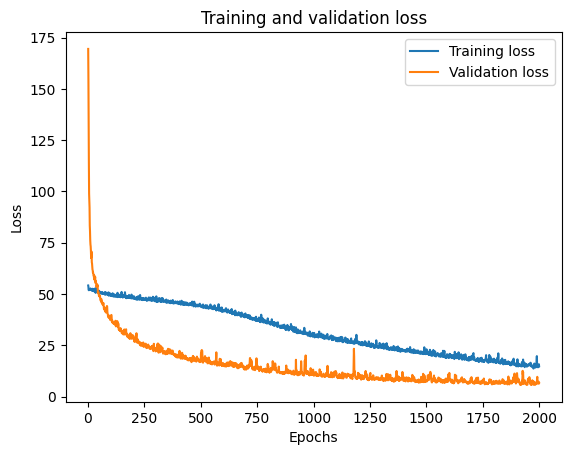

In [131]:
# Plot the training loss vs. epoch


training_loss = training_history.history['loss']
validation_loss = validation_history.history['loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


As can be seen in the graph, the validation loss starts much higher than the training data loss but lowers much quicker and stays consistently lower than the training loss. This suggests that the model is generalizing well to new unseen data. 

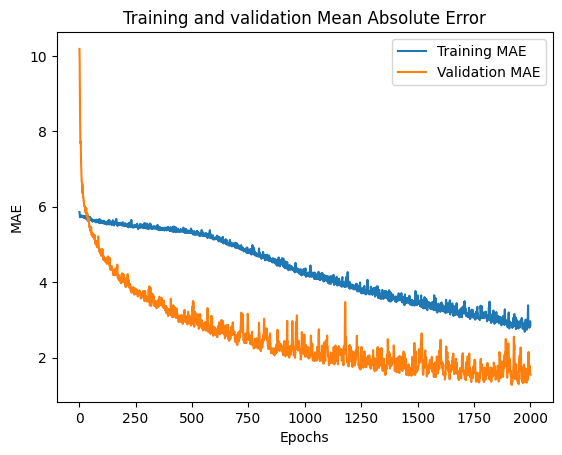

In [132]:
#graph mean absolute error
training_mae = training_history.history['mean_absolute_error']
validation_mae = validation_history.history['mean_absolute_error']

epochs = range(1, len(training_mae) + 1)

plt.plot(epochs, training_mae, label='Training MAE')
plt.plot(epochs, validation_mae, label='Validation MAE')
plt.title('Training and validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

The mae follows a similar pattern, again indicating that the model is generalising well to new unseen data. The graph indicates that the model should be able to predict to within roughly +/- 2 points how many points Steph will score on a night, given his past 5 performances and the team he is playing and their performances. 

# **Stage 6**
***Present results and Conclusions***



In [149]:
#lets have a look at a prediction to see if this is the case 
actual_points = steph_stats['PTS'].iloc[400]
print(actual_points)
#taking a random game and see how many points steph scored that night

26


In [ ]:
#now see how many points the model predicts he would score that night, given the past perfromances and opposition
prediction_x = X4.iloc[[400]]
print(prediction_x)

In [151]:
predicted_points = model_v6.predict(prediction_x)
print(predicted_points)

1/1 [==============================] - 0s 22ms/step
[[22.632317]]


The model predicted that Steph would score 22.6 points when in reality he scored 26. Give that the sportsbook setting the amount of points for the over / under has access to all of the same data and more complex methods, their prediction is most likely far closer to the actual number. As our model is not very accurate (3.4 points off) it would probably not be beneficial to increase our betting chances.

It will be interesting to use the model next season and input the values into it before each match and see how often you would beat the sportsbook if you followed the predictions made by the model. 

Additional parameters that could be added to the model to improve its accuracy could include information about whether it is a home or away game, look at teammates assists numbers, make sure that the 5 game rolling average is only applied if the games have been recent e.g. 5 games played before a 2 month injury or the off-season probably have very little bearing on the next game. 